In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 79% 16.0M/20.1M [00:00<00:00, 167MB/s]
100% 20.1M/20.1M [00:00<00:00, 181MB/s]


In [ ]:
! pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/competitions/udea-ai4eng-20242/data?select=train.csv")

100%|██████████| 20.1M/20.1M [00:00<00:00, 224MB/s]


Extracting archive ./udea-ai4eng-20242/udea-ai4eng-20242.zip to ./udea-ai4eng-20242


In [ ]:
!unzip /content/udea-ai4eng-20242.zip

Archive:  /content/udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
datos = pd.read_csv("train.csv")
print ("shape of loaded dataframe", datos.shape)

shape of loaded dataframe (692500, 12)


In [ ]:
datos.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
datos = datos[['FAMI_EDUCACIONMADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
datos.head()

,FAMI_EDUCACIONMADRE,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Postgrado,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica incompleta,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,Secundaria (Bachillerato) completa,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo


In [ ]:
colum = datos[['ESTU_PRGM_ACADEMICO', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']]
colum.head()

,ESTU_PRGM_ACADEMICO,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,ENFERMERIA,Estrato 3,medio-alto
1,DERECHO,Estrato 3,bajo
2,MERCADEO Y PUBLICIDAD,Estrato 3,bajo
3,ADMINISTRACION DE EMPRESAS,Estrato 4,alto
4,PSICOLOGIA,Estrato 3,medio-bajo


<Axes: xlabel='FAMI_EDUCACIONMADRE'>

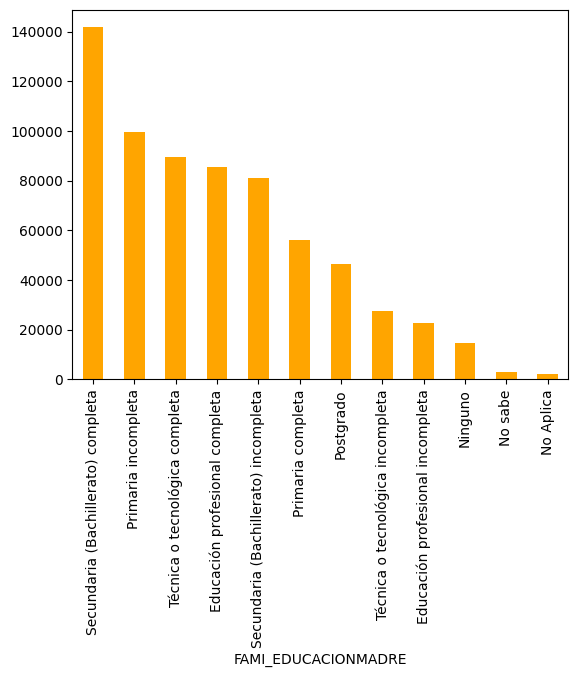

In [ ]:
datos.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar', color= "orange")

<Axes: xlabel='RENDIMIENTO_GLOBAL'>

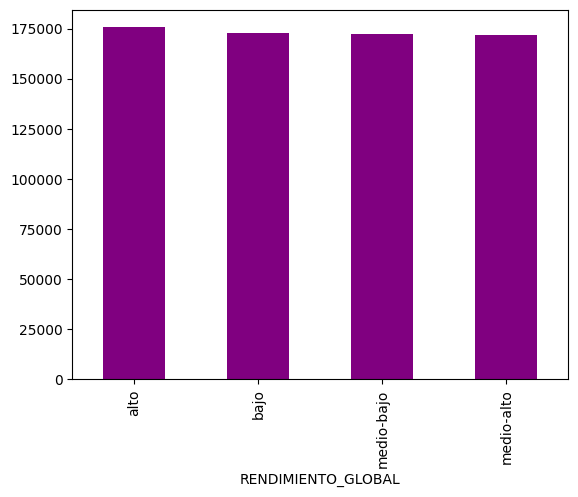

In [ ]:
datos.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar', color = "purple")

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

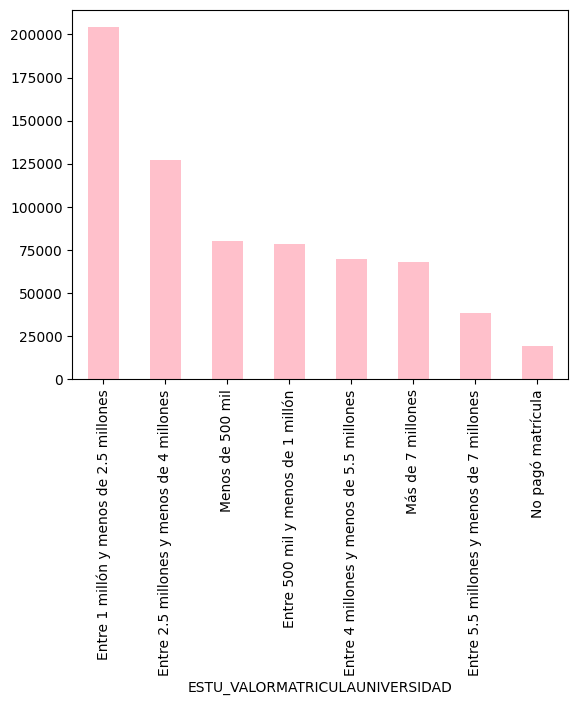

In [ ]:
datos.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar', color = "pink")

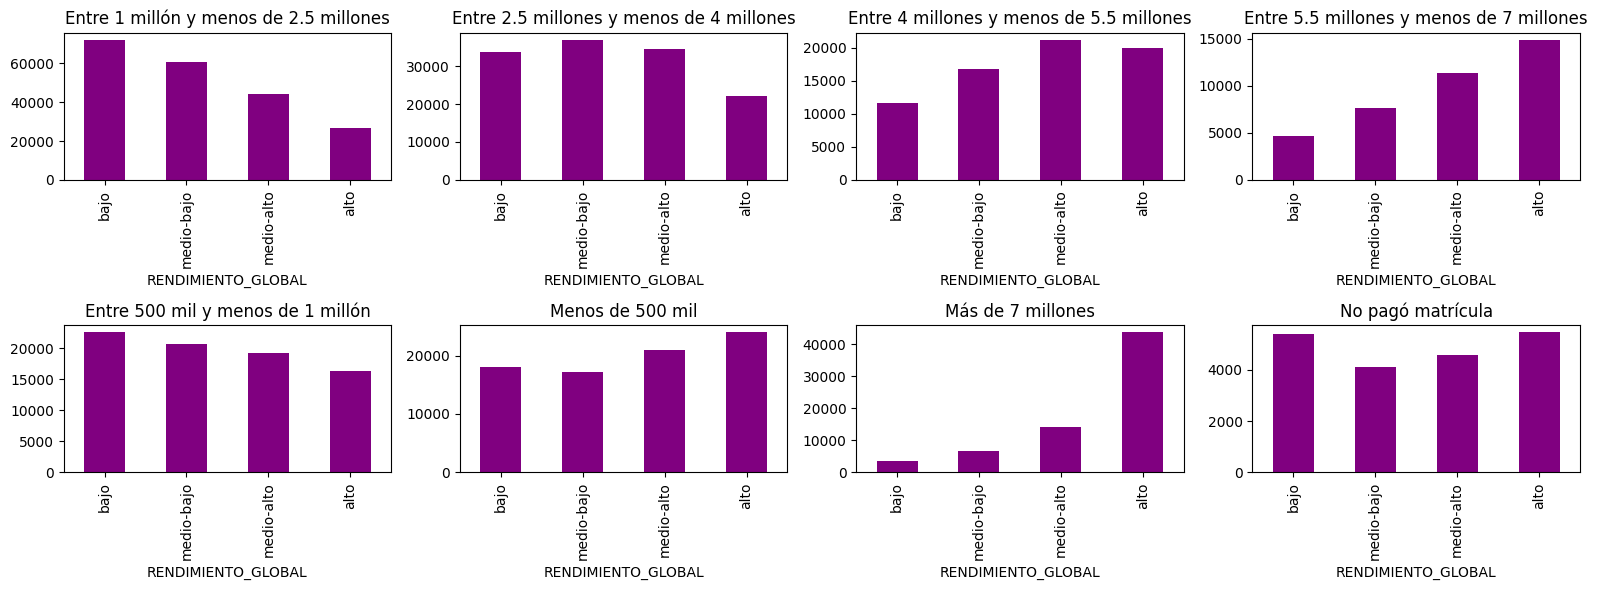

In [ ]:
!pip install rlxutils

from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(datos.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    d = datos[datos.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    d.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', color = "purple")
    plt.title(ci)

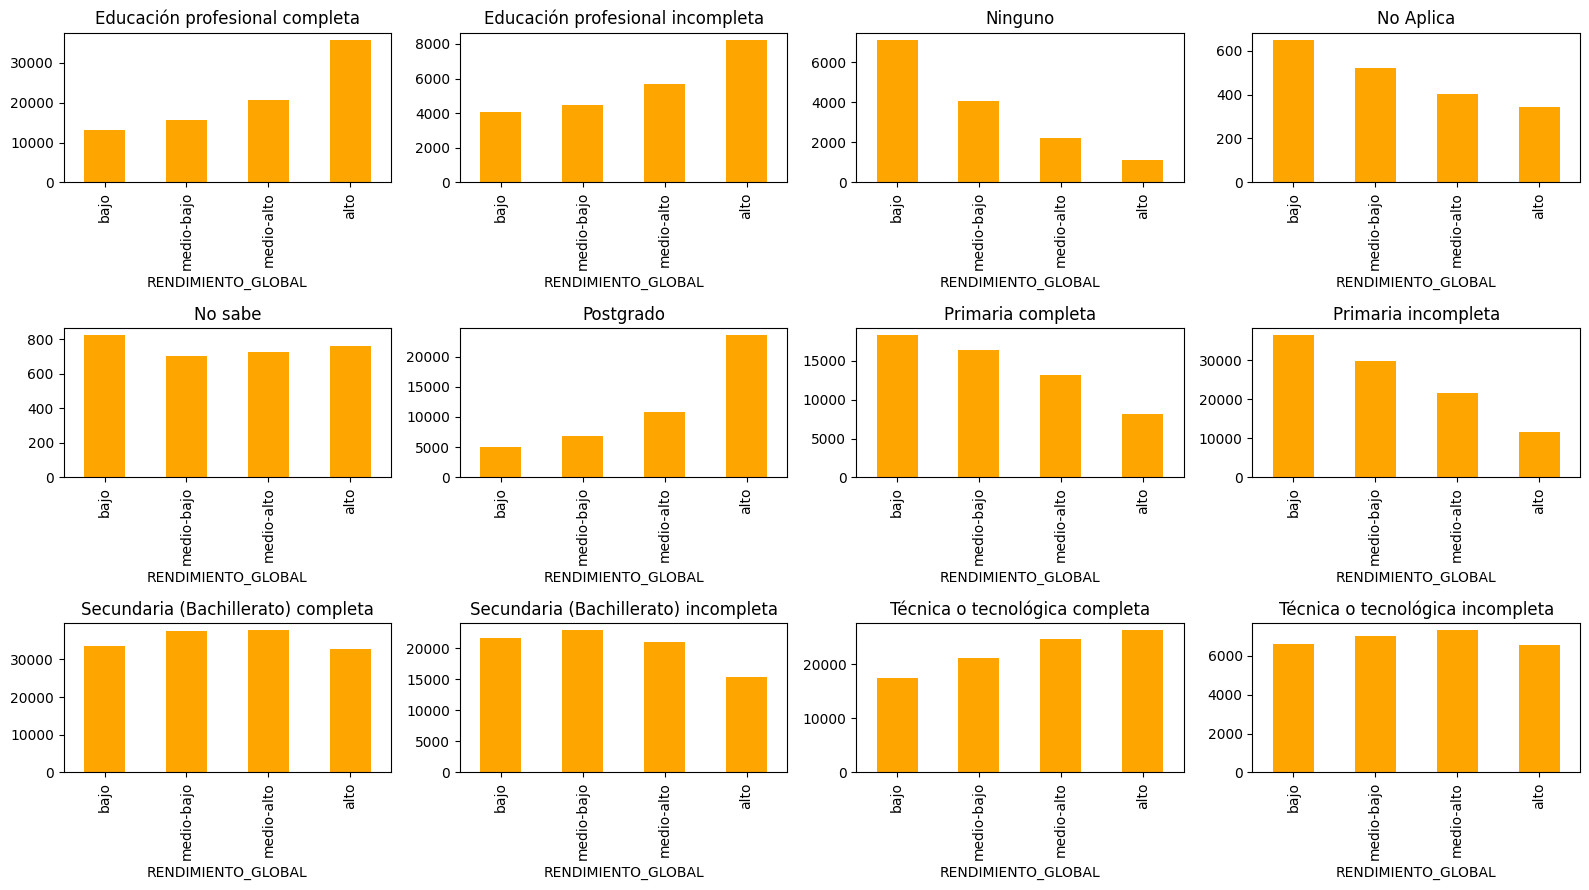

In [ ]:
!pip install rlxutils

from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(datos.FAMI_EDUCACIONMADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    d = datos[datos.FAMI_EDUCACIONMADRE==ci]
    d.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', color = "orange")
    plt.title(ci)

In [ ]:
sum(datos.FAMI_EDUCACIONMADRE.isna()), sum(datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna())

(23664, 6287)


Se sustituyen los valores nan con un símbolo preestablecido

In [ ]:
datos.FAMI_EDUCACIONMADRE.values[datos.FAMI_EDUCACIONMADRE.isna()] = 'no info'
datos.ESTU_VALORMATRICULAUNIVERSIDAD.values[datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
sum(datos.FAMI_EDUCACIONMADRE.isna()), sum(datos.ESTU_VALORMATRICULAUNIVERSIDAD.isna())

(0, 0)

Proceso de limpieza y transformación de datos relacionado con el valor de matrícula universitaria
(el objetivo es convertir categorías en valores continuos)

El valor de matrícula (almacenado en ESTU_VALORMATRICULAUNIVERSIDAD) se convierte en un número continuo usando un diccionario de mapeo (cmap). (Cada categoría de matrícula se asocia con un valor específico)

In [ ]:
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75, #es un promedio de ese rango
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

datos.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in datos.ESTU_VALORMATRICULAUNIVERSIDAD]]
#Se usa una lista para recorrer cada entrada en datos.ESTU_VALORMATRICULAUNIVERSIDAD, aplicando el mapeo definido en cmap.
#Esto produce una nueva serie con los valores convertidos.
datos.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()
#se llama a value_counts() para obtener un recuento de las nuevas categorías,
#lo que permite ver cuántos registros hay para cada valor transformado.

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


Proceso de limpieza de datos para la variable FAMI_EDUCACIONMADRE,(para manejar los datos faltantes y las categorías menos relevantes).

Algunas opciones para el tratamiento de datos, incluyen dejar los valores como están, eliminar filas con datos faltantes, o asignar un valor específico. Se combinan varias categorías relacionadas con la falta de información: "No info", "No sabe", y "No aplica" para evita tener muchas columnas diferentes

Por último se utiliza el one-hot encoding, que convierte a cada categoría en una columna binaria (1 o 0).

In [ ]:
datos = datos.copy()
datos.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in datos.FAMI_EDUCACIONMADRE.values]
#utilizo una lista para recorrer todos los datos y además se genera una copia de los datos originales
#Si i está en esa lista, se asigna el valor 'no info'. De lo contrario, se deja el valor original i

In [ ]:
datos.FAMI_EDUCACIONMADRE.value_counts() #para ver cuántas veces aparece cada dato

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
no info,28599
Técnica o tecnológica incompleta,27533


Ahora creamos el onehot mapping

In [ ]:
x = datos.FAMI_EDUCACIONMADRE.values #extraigo los valores
FAMI_EDUCACIONMADRE_vals = sorted(np.unique(x)) #np.unique(x) obtiene los valores únicos de x, y sorted los ordena
FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
#crea un diccionario FAMI_EDUCACIONMADRE_onehot_vals
#np.eye(len(FAMI_EDUCACIONMADRE_vals)) genera una matriz identidad donde cada fila representa un vector one-hot
FAMI_EDUCACIONMADRE_onehot_vals #nos arroja un diccionario

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
#np.r_ nos ayuda a concatenar todos los vectores one-hot para una matriz donde cada fila corresponde a un registro en datos y
#cada columna representa una categoría en FAMI_EDUCACIONMADRE
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in datos.FAMI_EDUCACIONMADRE]] #FAMI_EDUCACIONMADRE_onehot_vals[i] devuelve el vector one-hot asociado al valor i
#Para cada valor i en datos.FAMI_EDUCACIONMADRE, se busca el vector one-hot correspondiente en el diccionario FAMI_EDUCACIONMADRE_onehot_vals
FAMI_EDUCACIONMADRE_onehot_enc #será una matriz 2D, donde cada fila corresponde a un registro en los datos
# y cada columna corresponde a una categoría única de FAMI_EDUCACIONMADRE,
#con un valor de 1 en la columna correspondiente a la categoría del registro y 0 en las demás

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

Creamos un DataFrame de Pandas que contiene la codificación one-hot de la variable FAMI_EDUCACIONMADRE

In [ ]:
FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
#f"FAMI_EDUCACIONMADRE__{v}" crea un nombre de columna para cada valor único en FAMI_EDUCACIONMADRE_onehot_vals
FAMI_EDUCACIONMADRE_df

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Aquí combinamos el DataFrame FAMI_EDUCACIONMADRE_df(que contiene la codificación one-hot), con el DataFrame original datos, y al mismo tiempo elimina la columna original FAMI_EDUCACIONMADRE

se combinan FAMI_EDUCACIONMADRE_df y datos,
drop, elimina la columna FAMI_EDUCACIONMADRE del DataFrame resultante.
El resultado es un nuevo DataFrame "datos" que incluye las columnas de codificación one-hot
Ahora tenemos 13 columnas ya que se han agregado varias nuevas columnas de codificación y se ha eliminado la columna original

In [ ]:
datos = pd.concat([FAMI_EDUCACIONMADRE_df, datos], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
datos.shape

(692500, 13)

In [ ]:
datos.head()

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25,medio-alto
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.25,bajo
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.25,bajo
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.75,alto
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25,medio-bajo


Se convierte la columna de rendimiento global (predicción) en valores discretos

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
datos[y_col] = [rmap[i] for i in datos[y_col]]
datos.head()

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.25,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.25,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.75,3
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25,1


Busco obtener siempre el mismo orden

In [ ]:
datos = datos[sorted(datos.columns)]

X = datos[[c for c in datos.columns if c!=y_col]].values
y = datos[y_col].values
X.shape, y.shape

((692500, 12), (692500,))

Creo dos subconjuntos: uno para entrenar el modelo y otro para evaluar su rendimiento
X serán las caracteristicas
Y las etiquetas

train_size=0.8 indica que el 80% de los datos se utilizarán para el entrenamiento, mientras que el 20% restante se destinará a las pruebas

tr: entrenamiento
ts: prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 12), (138500, 12), (554000,), (138500,))